28022022

# Importing libraries

In [227]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

%matplotlib inline

In [228]:
# from scipy.stats import pointbiserialr
# from mlxtend.feature_selection import SequentialFeatureSelector
# from sklearn.feature_selection import RFE


# rfe = RFE(model, number of features to select) #> returns a model itself

# # fs = SequentialFeatureSelector(model, k_features='best/number in int', forward=True/False)
# # features = list(fs.k_feature_names_)

# # pointbiserialr(binary_var, cont_var)

# Reading the data

In [229]:
df = pd.read_csv('Data/CarPrice.csv')
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


# Analyzing the data

In [230]:
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [231]:
df.shape

(205, 26)

In [232]:
df.drop_duplicates().shape

(205, 26)

## Analyzing columns and identifying the relevant columns

In [233]:
numeric_columns = []
categorical_columns = []
removable_columns = []

In [234]:
for col in df.columns:
    if str(df[col].dtype).lower() == 'object':
        categorical_columns.append(col)
    else:
        numeric_columns.append(col)

In [235]:
numeric_columns

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [236]:
categorical_columns

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

## Quick Analysis of the numerical column data

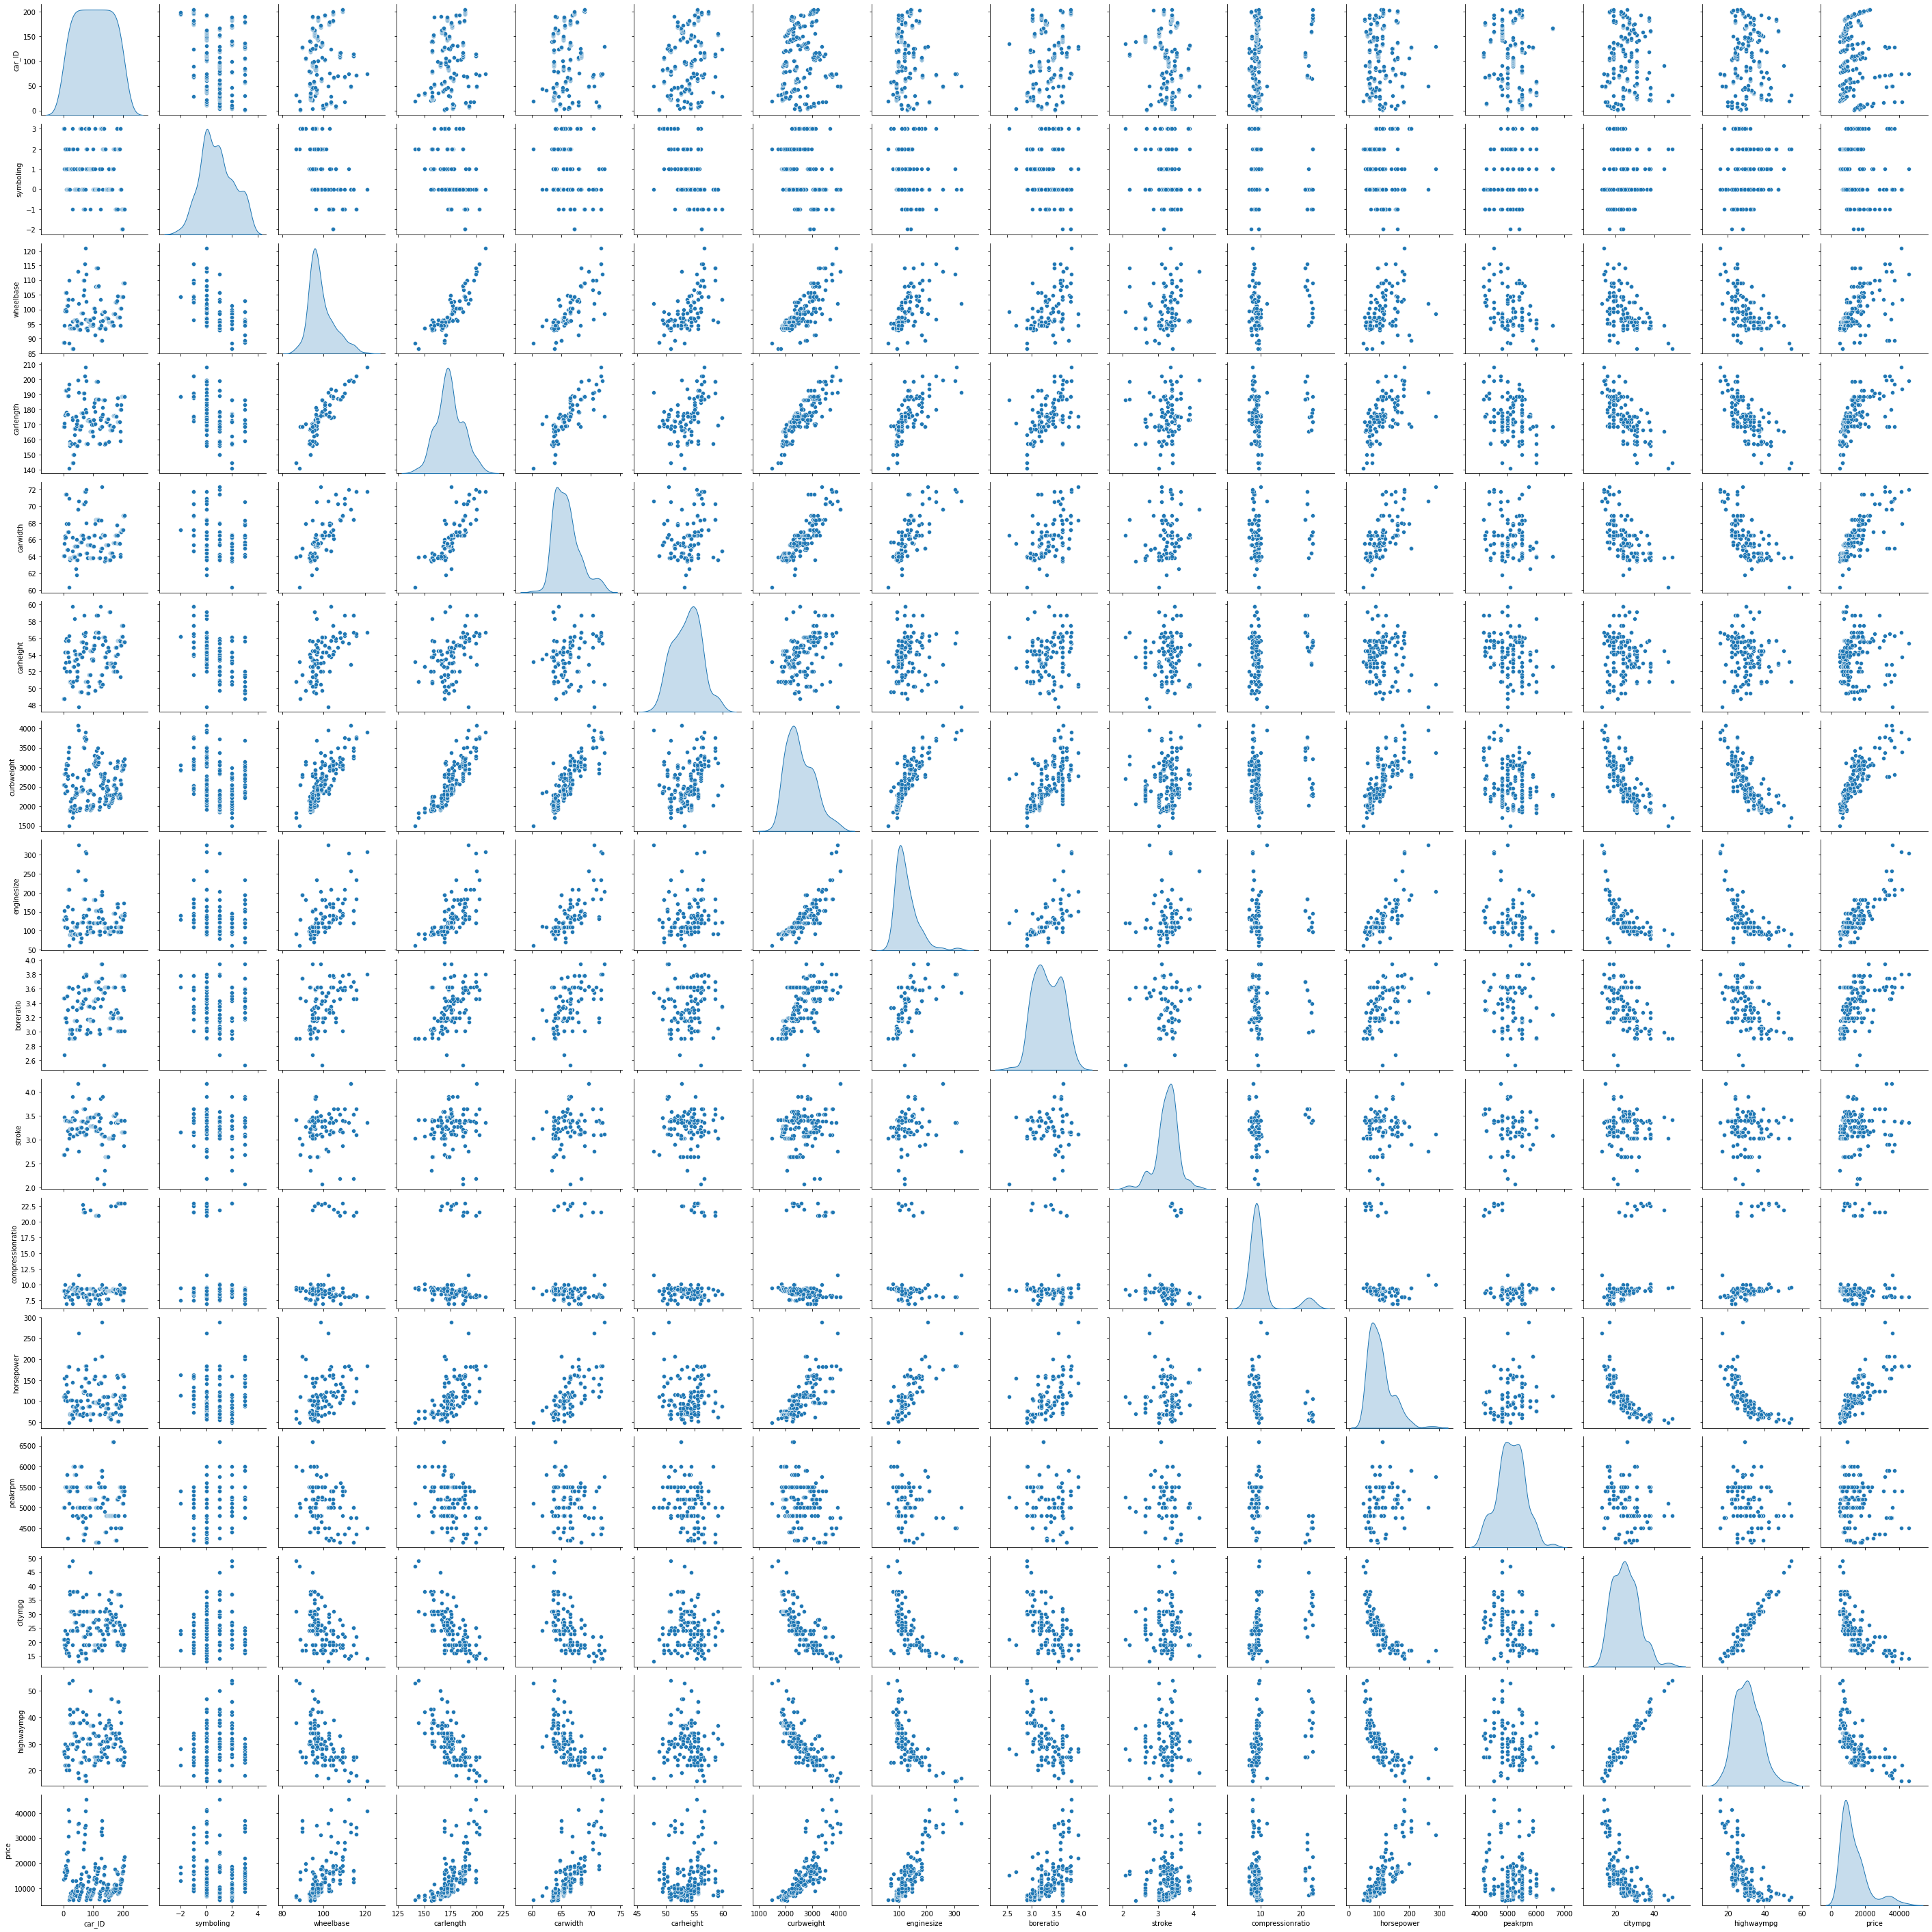

In [237]:
sns.pairplot(data = df[numeric_columns], diag_kind = 'kde')

- car_id, bore_ratio, stroke, peakrpm, wheelbase are possibly bad predictors

In [238]:
corr_matrix = df[numeric_columns].corr()
corr_matrix

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


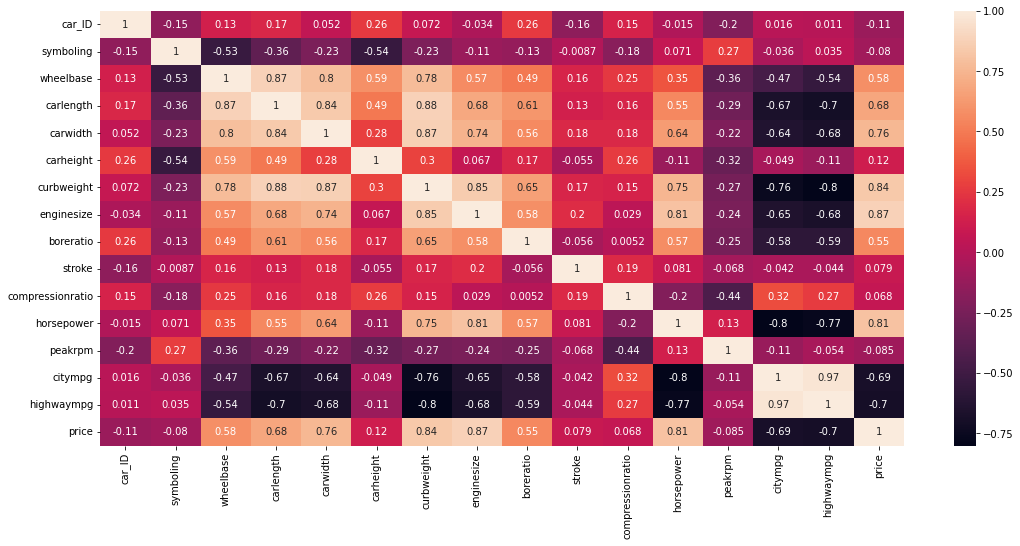

In [239]:
plt.figure(figsize=(18,8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

01032022

### Working a bit with color palettes in seaborn

In [240]:
# list of all the available color and color codes in seaborn
sns.colors.xkcd_rgb

{'acid green': '#8ffe09',
 'adobe': '#bd6c48',
 'algae': '#54ac68',
 'algae green': '#21c36f',
 'almost black': '#070d0d',
 'amber': '#feb308',
 'amethyst': '#9b5fc0',
 'apple': '#6ecb3c',
 'apple green': '#76cd26',
 'apricot': '#ffb16d',
 'aqua': '#13eac9',
 'aqua blue': '#02d8e9',
 'aqua green': '#12e193',
 'aqua marine': '#2ee8bb',
 'aquamarine': '#04d8b2',
 'army green': '#4b5d16',
 'asparagus': '#77ab56',
 'aubergine': '#3d0734',
 'auburn': '#9a3001',
 'avocado': '#90b134',
 'avocado green': '#87a922',
 'azul': '#1d5dec',
 'azure': '#069af3',
 'baby blue': '#a2cffe',
 'baby green': '#8cff9e',
 'baby pink': '#ffb7ce',
 'baby poo': '#ab9004',
 'baby poop': '#937c00',
 'baby poop green': '#8f9805',
 'baby puke green': '#b6c406',
 'baby purple': '#ca9bf7',
 'baby shit brown': '#ad900d',
 'baby shit green': '#889717',
 'banana': '#ffff7e',
 'banana yellow': '#fafe4b',
 'barbie pink': '#fe46a5',
 'barf green': '#94ac02',
 'barney': '#ac1db8',
 'barney purple': '#a00498',
 'battleship gr

In [241]:
# creating a custom color palette
sns.color_palette(palette=['#4a0100','#fcc006','#fffe7a','purple'])

[(0.2901960784313726, 0.00392156862745098, 0.0),
 (0.9882352941176471, 0.7529411764705882, 0.023529411764705882),
 (1.0, 0.996078431372549, 0.47843137254901963),
 (0.5019607843137255, 0.0, 0.5019607843137255)]

In [242]:
# Creating a custom color palette
color_code = 'orange'
dark_part = sns.dark_palette(color = color_code)
light_part = sns.light_palette(color = color_code)

mapper_obj = sns.color_palette(dark_part.__add__(list(light_part)[:-1][::-1]))
mapper_obj

[(0.16242582495759608, 0.14453866726676728, 0.1325356776096219),
 (0.3299406599660769, 0.24504269851929616, 0.10602854208769752),
 (0.49745549497455765, 0.3455467297718251, 0.07952140656577314),
 (0.6649703299830384, 0.4460507610243539, 0.05301427104384876),
 (0.8324851649915193, 0.5465547922768829, 0.02650713552192438),
 (1.0, 0.6470588235294118, 0.0),
 (0.9904743309404944, 0.7059821963905172, 0.18700048891235432),
 (0.9809486618809888, 0.7649055692516227, 0.37400097782470876),
 (0.9714229928214831, 0.8238289421127281, 0.5610014667370631),
 (0.9618973237619776, 0.8827523149738336, 0.7480019556494175),
 (0.952371654702472, 0.9416756878349389, 0.935002444561772)]

In [243]:
sns.dark_palette(color = color_code)

[(0.16242582495759608, 0.14453866726676728, 0.1325356776096219),
 (0.3299406599660769, 0.24504269851929616, 0.10602854208769752),
 (0.49745549497455765, 0.3455467297718251, 0.07952140656577314),
 (0.6649703299830384, 0.4460507610243539, 0.05301427104384876),
 (0.8324851649915193, 0.5465547922768829, 0.02650713552192438),
 (1.0, 0.6470588235294118, 0.0)]

In [244]:
sns.light_palette(color = color_code)

[(0.952371654702472, 0.9416756878349389, 0.935002444561772),
 (0.9618973237619776, 0.8827523149738336, 0.7480019556494175),
 (0.9714229928214831, 0.8238289421127281, 0.5610014667370631),
 (0.9809486618809888, 0.7649055692516227, 0.37400097782470876),
 (0.9904743309404944, 0.7059821963905172, 0.18700048891235432),
 (1.0, 0.6470588235294118, 0.0)]

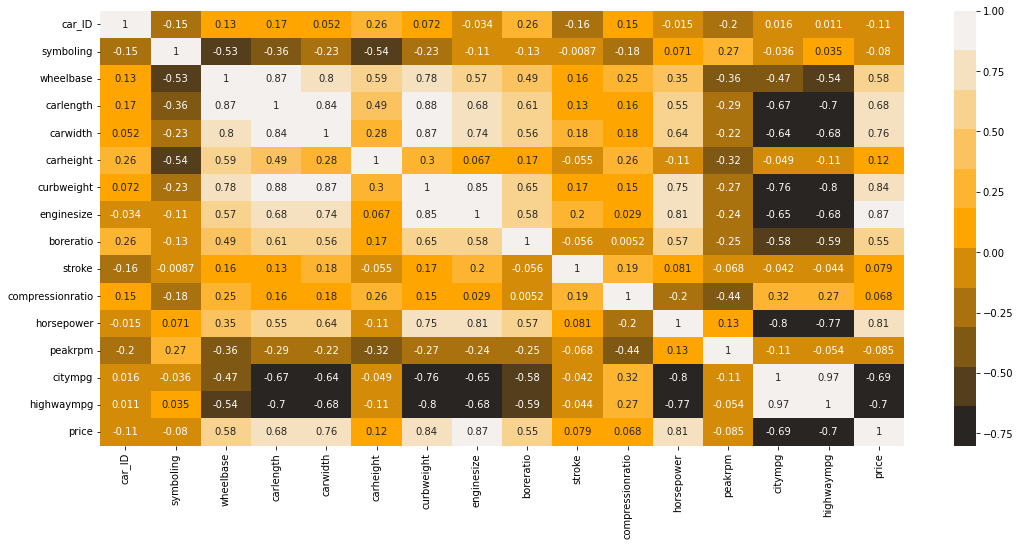

In [245]:
plt.figure(figsize = (18,8))
sns.heatmap(data = corr_matrix, annot=True, cmap = mapper_obj)
plt.show()

In [246]:
color_map = sns.color_palette(palette=['#937c00', '#889717', '#b6c406','#2ee8bb','#12e193','#8cff9e'])

dark_shade = sns.dark_palette(color='purple')
light_shade = sns.light_palette('#B0B7C6')
color_map2 = sns.palettes._ColorPalette(list(dark_shade).__add__(light_shade))

color_map2

[(0.16949189743051377, 0.13806689901726715, 0.16947713018450253),
 (0.2359856748071561, 0.11045351921381372, 0.23597386101034712),
 (0.30247945218379846, 0.08284013941036028, 0.30247059183619174),
 (0.3689732295604408, 0.05522675960690686, 0.3689673226620363),
 (0.4354670069370832, 0.027613379803453422, 0.435464053487881),
 (0.5019607843137255, 0.0, 0.5019607843137255),
 (0.9427712212988717, 0.9435333802645157, 0.9451021890719015),
 (0.8922561927253718, 0.8983561159763185, 0.91137586890458),
 (0.8417411641518721, 0.8531788516881211, 0.8776495487372585),
 (0.7912261355783722, 0.808001587399924, 0.8439232285699371),
 (0.7407111070048724, 0.7628243231117267, 0.8101969084026156),
 (0.6901960784313725, 0.7176470588235294, 0.7764705882352941)]

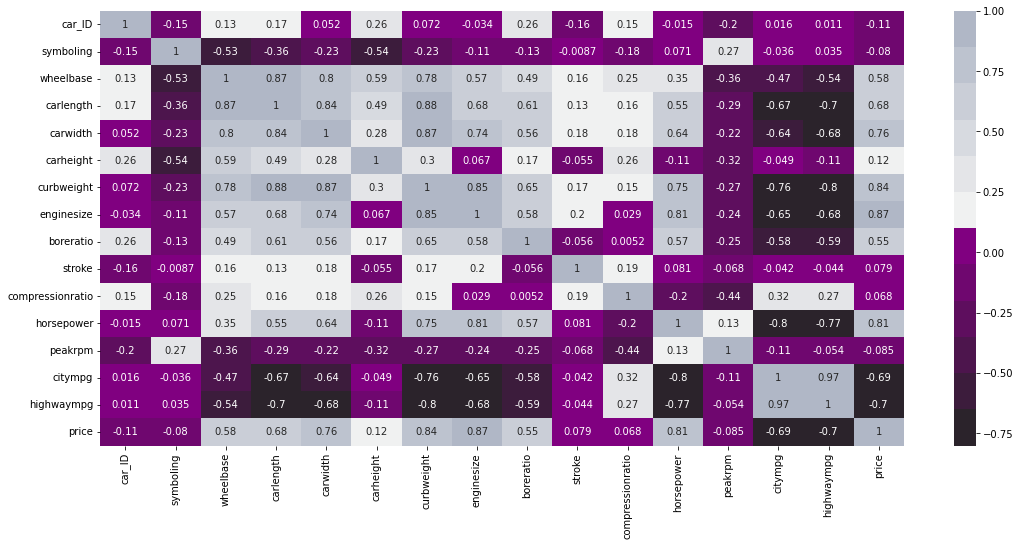

In [247]:
plt.figure(figsize = (18,8))
sns.heatmap(data = corr_matrix, annot=True, cmap = color_map2)
plt.show()

In [248]:
def filter_correlation_matrix(corr_matrix, threshold):
    filtered_corr = corr_matrix[(corr_matrix.price>=threshold)|(corr_matrix.price<=-1*threshold)]
    filtered_corr = filtered_corr[filtered_corr.index]
    return filtered_corr

In [249]:
filtered_corr_mat = filter_correlation_matrix(corr_matrix, 0.6)
filtered_corr_mat

,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,price
carlength,1.000000,0.841118,0.877728,0.683360,0.552623,-0.670909,-0.704662,0.682920
carwidth,0.841118,1.000000,0.867032,0.735433,0.640732,-0.642704,-0.677218,0.759325
curbweight,0.877728,0.867032,1.000000,0.850594,0.750739,-0.757414,-0.797465,0.835305
enginesize,0.683360,0.735433,0.850594,1.000000,0.809769,-0.653658,-0.677470,0.874145
horsepower,0.552623,0.640732,0.750739,0.809769,1.000000,-0.801456,-0.770544,0.808139
citympg,-0.670909,-0.642704,-0.757414,-0.653658,-0.801456,1.000000,0.971337,-0.685751
highwaympg,-0.704662,-0.677218,-0.797465,-0.677470,-0.770544,0.971337,1.000000,-0.697599
price,0.682920,0.759325,0.835305,0.874145,0.808139,-0.685751,-0.697599,1.000000


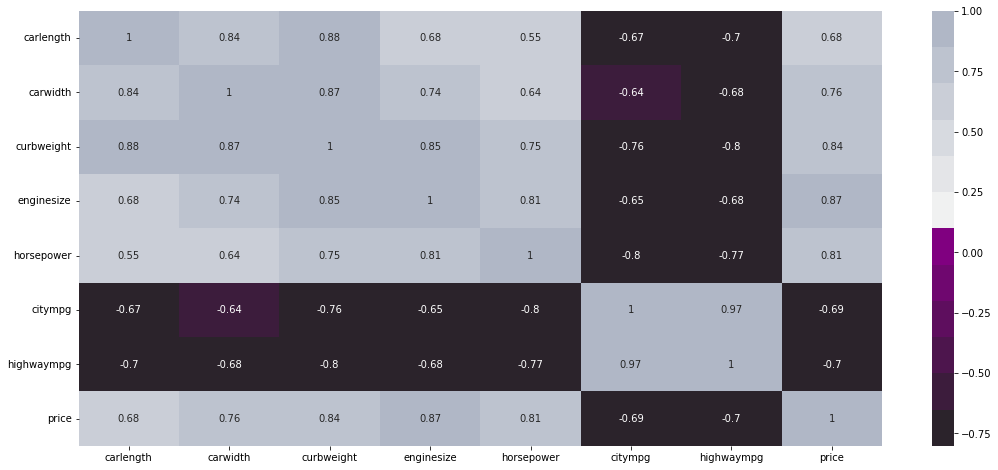

In [250]:
plt.figure(figsize = (18,8))
sns.heatmap(data = filtered_corr_mat, annot=True, cmap = color_map2)
plt.show()

In [251]:
filtered_corr_mat1 = filtered_corr_mat.drop(columns=['citympg'])
filtered_corr_mat1 = filtered_corr_mat1.loc[filtered_corr_mat1.columns, :]
filtered_corr_mat1

,carlength,carwidth,curbweight,enginesize,horsepower,highwaympg,price
carlength,1.000000,0.841118,0.877728,0.683360,0.552623,-0.704662,0.682920
carwidth,0.841118,1.000000,0.867032,0.735433,0.640732,-0.677218,0.759325
curbweight,0.877728,0.867032,1.000000,0.850594,0.750739,-0.797465,0.835305
enginesize,0.683360,0.735433,0.850594,1.000000,0.809769,-0.677470,0.874145
horsepower,0.552623,0.640732,0.750739,0.809769,1.000000,-0.770544,0.808139
highwaympg,-0.704662,-0.677218,-0.797465,-0.677470,-0.770544,1.000000,-0.697599
price,0.682920,0.759325,0.835305,0.874145,0.808139,-0.697599,1.000000


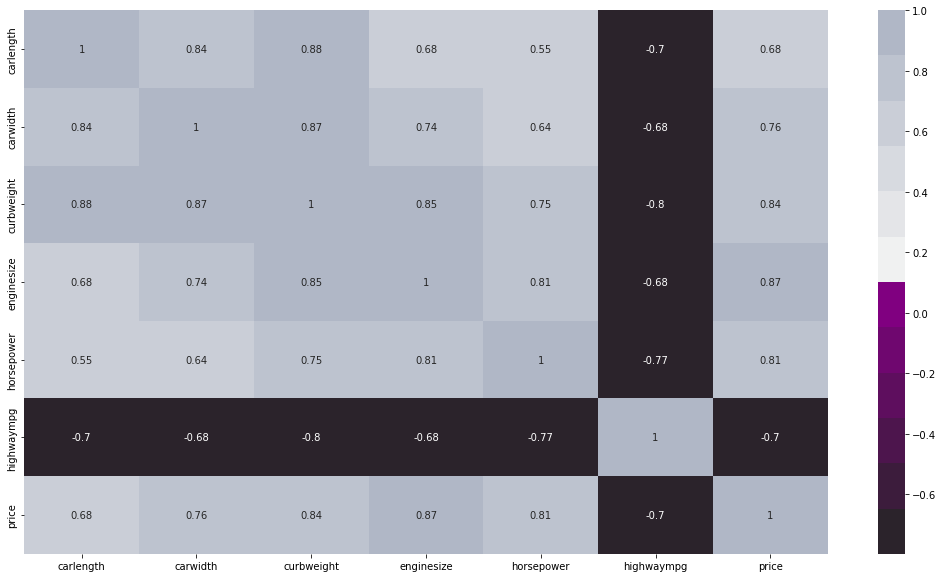

In [252]:
plt.figure(figsize = (18,10))
sns.heatmap(data = filtered_corr_mat1, annot=True, cmap = color_map2)
plt.show()

In [253]:
selected_numerical_features = filtered_corr_mat1.columns
selected_numerical_features

Index(['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
       'highwaympg', 'price'],
      dtype='object')

### Handling/Working with cartegorical data

In [254]:
categorical_columns

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

#### CarName

In [255]:
df.CarName.nunique()

147

In [256]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

#### Encoding in a nutshell

##### 1. Numerical Encoding

In [257]:
car_name_mapper = {name:val for name,val in zip(df.CarName.unique(), range(df.CarName.nunique()))}
car_name_mapper

{'alfa-romero giulia': 0,
 'alfa-romero stelvio': 1,
 'alfa-romero Quadrifoglio': 2,
 'audi 100 ls': 3,
 'audi 100ls': 4,
 'audi fox': 5,
 'audi 5000': 6,
 'audi 4000': 7,
 'audi 5000s (diesel)': 8,
 'bmw 320i': 9,
 'bmw x1': 10,
 'bmw x3': 11,
 'bmw z4': 12,
 'bmw x4': 13,
 'bmw x5': 14,
 'chevrolet impala': 15,
 'chevrolet monte carlo': 16,
 'chevrolet vega 2300': 17,
 'dodge rampage': 18,
 'dodge challenger se': 19,
 'dodge d200': 20,
 'dodge monaco (sw)': 21,
 'dodge colt hardtop': 22,
 'dodge colt (sw)': 23,
 'dodge coronet custom': 24,
 'dodge dart custom': 25,
 'dodge coronet custom (sw)': 26,
 'honda civic': 27,
 'honda civic cvcc': 28,
 'honda accord cvcc': 29,
 'honda accord lx': 30,
 'honda civic 1500 gl': 31,
 'honda accord': 32,
 'honda civic 1300': 33,
 'honda prelude': 34,
 'honda civic (auto)': 35,
 'isuzu MU-X': 36,
 'isuzu D-Max ': 37,
 'isuzu D-Max V-Cross': 38,
 'jaguar xj': 39,
 'jaguar xf': 40,
 'jaguar xk': 41,
 'maxda rx3': 42,
 'maxda glc deluxe': 43,
 'mazda r

In [258]:
df['CarName_Encoded'] = df.CarName.replace(car_name_mapper)

In [259]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_Encoded
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,2
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,3
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,4


##### 2. One-Hot Encoding

In [260]:
gender = pd.Series([np.random.choice(['Male','Female', 'Non-binary', 'Trans']) for i in range(20)])
gender

0         Female
1     Non-binary
2           Male
3           Male
4           Male
5           Male
6     Non-binary
7     Non-binary
8           Male
9     Non-binary
10        Female
11          Male
12    Non-binary
13         Trans
14        Female
15        Female
16        Female
17          Male
18         Trans
19    Non-binary
dtype: object

In [261]:
Male = np.where(gender=='Male', 1, 0)
Male

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [262]:
Female = np.where(gender=='Female', 1, 0)
Female

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [263]:
Non_binary = np.where(gender=='Non-binary', 1, 0)
Non_binary

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [264]:
Trans = np.where(gender=='Trans', 1, 0)
Trans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [265]:
pd.DataFrame({'Gender':gender,'Male-OHE':Male, 
              'Female-OHE':Female, 
              'Non_Binary-OHE':Non_binary, 
              'Trans-OHE':Trans})

,Gender,Male-OHE,Female-OHE,Non_Binary-OHE,Trans-OHE
0,Female,0,1,0,0
1,Non-binary,0,0,1,0
2,Male,1,0,0,0
3,Male,1,0,0,0
4,Male,1,0,0,0
5,Male,1,0,0,0
6,Non-binary,0,0,1,0
7,Non-binary,0,0,1,0
8,Male,1,0,0,0
9,Non-binary,0,0,1,0


- Curse of dimensionality : The more features you will have, the more complex your system would become
- Complexity is always inversely proportional to model performance

In [266]:
car_company_names = df.CarName.apply(lambda car_name : car_name.lower().split()[0].strip().replace('-',' '))
car_company_names.unique()

array(['alfa romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [267]:
car_company_name_mapper = {'porcshce':'porsche', 'toyouta':'toyota', 'vokswagen':'volkswagen', 'vw':'volkswagen', 'maxda':'mazda'}
new_car_company_names = car_company_names.replace(car_company_name_mapper)
new_car_company_names

0      alfa romero
1      alfa romero
2      alfa romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [268]:
new_car_company_names.unique()

array(['alfa romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [269]:
df['CarCompanyName'] = new_car_company_names

In [270]:
df.CarCompanyName.nunique()

22

##### 3. Label Encoding on Car Company Name

In [271]:
# instantiating the label encoder object
company_name_le = LabelEncoder()

In [272]:
# encoding the data
df['CarCompanyName_le'] = company_name_le.fit_transform(df.CarCompanyName)
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_Encoded,CarCompanyName,CarCompanyName_le
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,0,alfa romero,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,1,alfa romero,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,2,alfa romero,0


##### Understanding the fit, transform and fit_transform methods

In [273]:
# initiate the encoder object
le_object = LabelEncoder()

In [274]:
dir(le_object)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'fit',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'set_output',
 'set_params',
 'transform']

In [275]:
le_object.get_params()

{}

In [276]:
col = df.fueltype
col.unique()

array(['gas', 'diesel'], dtype=object)

In [277]:
# Learning the patterns
le_object.fit(col)

LabelEncoder()

In [278]:
# Transformation of the textual data
le_object.transform(col)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1])

In [279]:
# initiate the encoder object
le_object1 = LabelEncoder()

In [280]:
le_object1.fit_transform(col)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1])

In [281]:
le_object.inverse_transform([0,1])

array(['diesel', 'gas'], dtype=object)

In [282]:
le_object1.inverse_transform([0,1])

array(['diesel', 'gas'], dtype=object)

In [283]:
# initiate the encoder object
le_object2 = LabelEncoder()

In [284]:
le_object2.__getstate__()

{'_sklearn_version': '1.2.0'}

In [285]:
le_object2.fit(df.aspiration)

LabelEncoder()

In [286]:
le_object2.__getstate__()

{'classes_': array(['std', 'turbo'], dtype=object),
 '_sklearn_version': '1.2.0'}

In [287]:
# Encoding the data
encoded = le_object2.transform(df.aspiration)
encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1])

In [288]:
# Decoding the data
le_object2.inverse_transform(encoded)

array(['std', 'std', 'std', 'std', 'std', 'std', 'std', 'std', 'turbo',
       'turbo', 'std', 'std', 'std', 'std', 'std', 'std', 'std', 'std',
       'std', 'std', 'std', 'std', 'std', 'turbo', 'std', 'std', 'std',
       'turbo', 'std', 'turbo', 'std', 'std', 'std', 'std', 'std', 'std',
       'std', 'std', 'std', 'std', 'std', 'std', 'std', 'std', 'std',
       'std', 'std', 'std', 'std', 'std', 'std', 'std', 'std', 'std',
       'std', 'std', 'std', 'std', 'std', 'std', 'std', 'std', 'std',
       'std', 'std', 'std', 'std', 'turbo', 'turbo', 'turbo', 'turbo',
       'std', 'std', 'std', 'std', 'turbo', 'std', 'std', 'std', 'turbo',
       'turbo', 'std', 'turbo', 'turbo', 'turbo', 'std', 'std', 'turbo',
       'std', 'std', 'std', 'std', 'std', 'std', 'std', 'std', 'std',
       'std', 'std', 'std', 'std', 'std', 'std', 'std', 'std', 'turbo',
       'std', 'std', 'turbo', 'std', 'turbo', 'std', 'turbo', 'std',
       'turbo', 'std', 'turbo', 'turbo', 'std', 'turbo', 'std', 'std',


In [289]:
df.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [290]:
le1 = LabelEncoder()

In [291]:
le1.fit(df.enginetype)

LabelEncoder()

In [292]:
enginetype_encoded = le1.transform(df.enginetype)
enginetype_encoded

array([0, 0, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 5, 3, 3, 3, 3, 3, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 1, 3, 3,
       3, 3, 3, 3, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 5, 3, 3])

In [293]:
pd.DataFrame({'EngineType':df.enginetype, 'EngineType-encoded':enginetype_encoded})

,EngineType,EngineType-encoded
0,dohc,0
1,dohc,0
2,ohcv,5
3,ohc,3
4,ohc,3
...,...,...
200,ohc,3
201,ohc,3
202,ohcv,5
203,ohc,3


In [294]:
le1.__getstate__()

{'classes_': array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object),
 '_sklearn_version': '1.2.0'}

In [295]:
le2 = LabelEncoder()

In [296]:
enginetype_encoded2 = le2.fit_transform(df.enginetype)
enginetype_encoded2

array([0, 0, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 5, 3, 3, 3, 3, 3, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 1, 3, 3,
       3, 3, 3, 3, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 5, 3, 3])

In [297]:
pd.DataFrame({'EngineType':df.enginetype, 'EngineType-encoded':enginetype_encoded2})

,EngineType,EngineType-encoded
0,dohc,0
1,dohc,0
2,ohcv,5
3,ohc,3
4,ohc,3
...,...,...
200,ohc,3
201,ohc,3
202,ohcv,5
203,ohc,3


In [298]:
{val:i for i,val in enumerate(sorted(le2.__getstate__().get('classes_')))}

{'dohc': 0, 'dohcv': 1, 'l': 2, 'ohc': 3, 'ohcf': 4, 'ohcv': 5, 'rotor': 6}

##### 4. Working on fuel-type

In [299]:
df.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [300]:
pd.get_dummies(df.fueltype)

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [301]:
fueltype_ohe = pd.get_dummies(df.fueltype, prefix = 'fueltype', drop_first=True)
fueltype_ohe

,fueltype_gas
0,1
1,1
2,1
3,1
4,1
...,...
200,1
201,1
202,1
203,0


In [302]:
fueltype_ohe.drop(columns = ['fueltype_gas'])

""
0
1
2
3
4
...
200
201
202
203


In [303]:
df = pd.concat((df, fueltype_ohe), axis = 'columns')
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_Encoded,CarCompanyName,CarCompanyName_le,fueltype_gas
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000,21,27,13495.0,0,alfa romero,0,1
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000,21,27,16500.0,1,alfa romero,0,1
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000,19,26,16500.0,2,alfa romero,0,1


In [304]:
categorical_columns

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

##### 5. Working on aspiration

In [305]:
df.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [306]:
aspiration_ohe = pd.get_dummies(df.aspiration, prefix='aspiration', drop_first=True)
aspiration_ohe

,aspiration_turbo
0,0
1,0
2,0
3,0
4,0
...,...
200,0
201,1
202,0
203,1


In [307]:
df = pd.concat((df, aspiration_ohe), axis = 'columns')
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,horsepower,peakrpm,citympg,highwaympg,price,CarName_Encoded,CarCompanyName,CarCompanyName_le,fueltype_gas,aspiration_turbo
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,111,5000,21,27,13495.0,0,alfa romero,0,1,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,111,5000,21,27,16500.0,1,alfa romero,0,1,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,154,5000,19,26,16500.0,2,alfa romero,0,1,0


##### 6 Working on doornumber

In [308]:
df.doornumber.unique()

array(['two', 'four'], dtype=object)

In [309]:
doornumber_replacer = {'two':2, 'four':4}

df['doornumber_num'] = df.doornumber.replace(doornumber_replacer)
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,peakrpm,citympg,highwaympg,price,CarName_Encoded,CarCompanyName,CarCompanyName_le,fueltype_gas,aspiration_turbo,doornumber_num
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,5000,21,27,13495.0,0,alfa romero,0,1,0,2
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,5000,21,27,16500.0,1,alfa romero,0,1,0,2
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,5000,19,26,16500.0,2,alfa romero,0,1,0,2


##### 7. Working on carbody

In [310]:
df.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

###### Ordinal encoder without pre-defined sequence

In [311]:
ord_1 = OrdinalEncoder()
x = ord_1.fit_transform(df[['carbody']])  # it needs a two dimensional data form for conversion and it would return a two dimensional nd array

In [312]:
x.ndim

2

In [313]:
dummy = pd.DataFrame({'og':df.carbody, 'transformed':x.flatten()})
dummy.drop_duplicates().sort_values('og')

,og,transformed
0,convertible,0.0
69,hardtop,1.0
2,hatchback,2.0
3,sedan,3.0
7,wagon,4.0


###### Ordinal encoder with pre-defined sequence

In [314]:
ord_seq_for_carbody = ['wagon', 'hatchback', 'sedan', 'hardtop', 'convertible']

In [315]:
ord_enc = OrdinalEncoder(categories=[ord_seq_for_carbody])

In [316]:
{cat:i for i, cat in enumerate(ord_seq_for_carbody)}

{'wagon': 0, 'hatchback': 1, 'sedan': 2, 'hardtop': 3, 'convertible': 4}

In [317]:
carbody_ord_enc = ord_enc.fit_transform(df[['carbody']]).flatten()
carbody_ord_enc = list(map(int, carbody_ord_enc))

In [318]:
df['carbody_ord_enc'] = carbody_ord_enc
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,citympg,highwaympg,price,CarName_Encoded,CarCompanyName,CarCompanyName_le,fueltype_gas,aspiration_turbo,doornumber_num,carbody_ord_enc
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,21,27,13495.0,0,alfa romero,0,1,0,2,4
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,21,27,16500.0,1,alfa romero,0,1,0,2,4
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,19,26,16500.0,2,alfa romero,0,1,0,2,1


##### Ohe hot encoding on the drivewheel column

In [319]:
df.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [320]:
# One hot encoding the drive wheel column
drivewheel_ohe = pd.get_dummies(df.drivewheel, prefix='drivewheel', drop_first=True)

# concatenating the data
df = pd.concat((df, drivewheel_ohe), axis = 'columns')

##### Ohe hot encoding on the enginelocation column

In [321]:
df.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [322]:
enginelocation_ohe = pd.get_dummies(df.enginelocation, prefix = 'enginelocation', drop_first=True)

df = pd.concat((df, enginelocation_ohe), axis = 'columns')

###### Ohe hot encoding on the enginetype column

In [323]:
df.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [324]:
enginetype_ohe = pd.get_dummies(df.enginetype, prefix = 'enginetype', drop_first=True)

df = pd.concat((df, enginetype_ohe), axis = 'columns')

###### categorical mapping the cylindernumber column

In [325]:
df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [326]:
cylindernumber_mapper = {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}

df['cylindernumber_mapped'] = df.cylindernumber.replace(cylindernumber_mapper)

df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_mapped
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,0,1,0,0,0,0,0,0,0,4
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,0,1,0,0,0,0,0,0,0,4
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,0,1,0,0,0,0,0,1,0,6


###### Ohe hot encoding on the fuelsystem column

In [327]:
df.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [328]:
fuelsystem_ohe = pd.get_dummies(df.fuelsystem, prefix = 'fuelsystem', drop_first=True)

df = pd.concat((df, fuelsystem_ohe), axis = 'columns')

#### Dropping the original categorical columns

In [329]:
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginetype_ohcv,enginetype_rotor,cylindernumber_mapped,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,0,0,4,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,0,0,4,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,1,0,6,0,0,0,0,1,0,0


In [330]:
categorical_columns

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [331]:
df_processed = df.drop(columns = categorical_columns.__add__(['car_ID', 'CarCompanyName']))
df_processed.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohcv,enginetype_rotor,cylindernumber_mapped,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,4,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,4,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,1,0,6,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,4,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,5,0,0,0,0,1,0,0


# Modelling on the data

In [348]:
df_processed.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohcv,enginetype_rotor,cylindernumber_mapped,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,4,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,4,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,1,0,6,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,4,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,5,0,0,0,0,1,0,0


In [349]:
df_processed.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'CarName_Encoded', 'CarCompanyName_le', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_num', 'carbody_ord_enc',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_mapped',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')

## Segregating the feature and the target columns

In [350]:
target_column = ['price']
feature_columns = df_processed.columns.difference(target_column)

## Train test split/ train-validation split/ data splits

### Split ratio

Approach to generate/preserve a part of the data that can act as `unseen` data while validating the model been trained

2000 
- applied a variety of processes to process the data
- choose a mathematical/statistical model based on the data
- train the model --> evaluate the model using data that you have not used to train the model/ using data that the model has never seen before

### Data leakage

- The data that you have used for training the model is influencing the test data in some way

Why is data leakage a problem ?
- When data leakage occurs, we will get great performance on train and test datasets but after productionalizing the model would fail pathetically on the real world data(the data that it has never seen ever before)

In [351]:
arr1 = np.random.randint(0,70,(100,))
arr1

array([24, 24, 53, 30, 33, 51, 11, 31, 47, 44, 59, 15, 10, 60, 52, 31, 24,
        2, 36, 11, 63,  9, 47, 52, 16, 29, 37,  6,  0, 49, 18,  6,  4, 32,
       12,  3,  1, 67, 35,  9, 50, 65, 30, 57, 35, 63, 14, 64, 37, 44, 26,
        0, 10, 49, 68, 62, 31,  9, 15, 57, 64, 64, 63,  0, 25, 54, 23, 33,
       41, 68, 40, 50,  3, 15, 27, 48, 60, 24,  8, 23, 61, 66, 57, 68, 28,
       26, 58, 55, 64, 64, 24, 27, 21, 14, 18, 45, 45, 13,  2, 14])

In [352]:
arr2 = np.random.randint(25,68, (20,))
arr2

array([43, 30, 65, 53, 60, 49, 33, 41, 32, 56, 57, 46, 62, 35, 28, 51, 62,
       52, 54, 31])

In [353]:
def transform(array, mean=None):
    return array/mean

In [354]:
m1 = arr1.mean()
m2 = arr2.mean()

m1, m2

(34.32, 47.0)

In [355]:
arr1t = transform(arr1, m1)
arr1t

array([0.6993007 , 0.6993007 , 1.54428904, 0.87412587, 0.96153846,
       1.48601399, 0.32051282, 0.9032634 , 1.36946387, 1.28205128,
       1.71911422, 0.43706294, 0.29137529, 1.74825175, 1.51515152,
       0.9032634 , 0.6993007 , 0.05827506, 1.04895105, 0.32051282,
       1.83566434, 0.26223776, 1.36946387, 1.51515152, 0.46620047,
       0.84498834, 1.07808858, 0.17482517, 0.        , 1.42773893,
       0.52447552, 0.17482517, 0.11655012, 0.93240093, 0.34965035,
       0.08741259, 0.02913753, 1.95221445, 1.01981352, 0.26223776,
       1.45687646, 1.89393939, 0.87412587, 1.66083916, 1.01981352,
       1.83566434, 0.40792541, 1.86480186, 1.07808858, 1.28205128,
       0.75757576, 0.        , 0.29137529, 1.42773893, 1.98135198,
       1.80652681, 0.9032634 , 0.26223776, 0.43706294, 1.66083916,
       1.86480186, 1.86480186, 1.83566434, 0.        , 0.72843823,
       1.57342657, 0.67016317, 0.96153846, 1.19463869, 1.98135198,
       1.16550117, 1.45687646, 0.08741259, 0.43706294, 0.78671

In [356]:
arr2t = transform(arr2, m1)
arr2t

array([1.25291375, 0.87412587, 1.89393939, 1.54428904, 1.74825175,
       1.42773893, 0.96153846, 1.19463869, 0.93240093, 1.63170163,
       1.66083916, 1.34032634, 1.80652681, 1.01981352, 0.81585082,
       1.48601399, 1.80652681, 1.51515152, 1.57342657, 0.9032634 ])

In [357]:
transform(arr2, m2)

array([0.91489362, 0.63829787, 1.38297872, 1.12765957, 1.27659574,
       1.04255319, 0.70212766, 0.87234043, 0.68085106, 1.19148936,
       1.21276596, 0.9787234 , 1.31914894, 0.74468085, 0.59574468,
       1.08510638, 1.31914894, 1.10638298, 1.14893617, 0.65957447])

Scalers are mathematical transformations that are used to bring the data in a predefined range

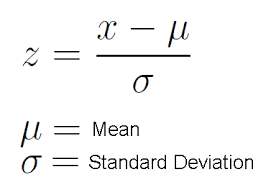

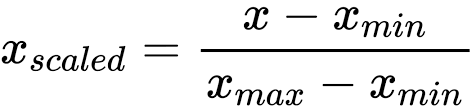

### Dummy-Variable Trap

In [358]:
df.carbody

0      convertible
1      convertible
2        hatchback
3            sedan
4            sedan
          ...     
200          sedan
201          sedan
202          sedan
203          sedan
204          sedan
Name: carbody, Length: 205, dtype: object

In [359]:
df.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [360]:
dummy1 = pd.get_dummies(df.carbody, prefix='carbody')
dummy1.head(3)

,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0


In [361]:
dummy1.drop(columns = ['carbody_convertible'])

,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
200,0,0,1,0
201,0,0,1,0
202,0,0,1,0
203,0,0,1,0


In [362]:
dummy2 = pd.get_dummies(df.carbody, prefix='carbody', drop_first=True)
dummy2.head(3)

,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0


### Curse of dimensionality

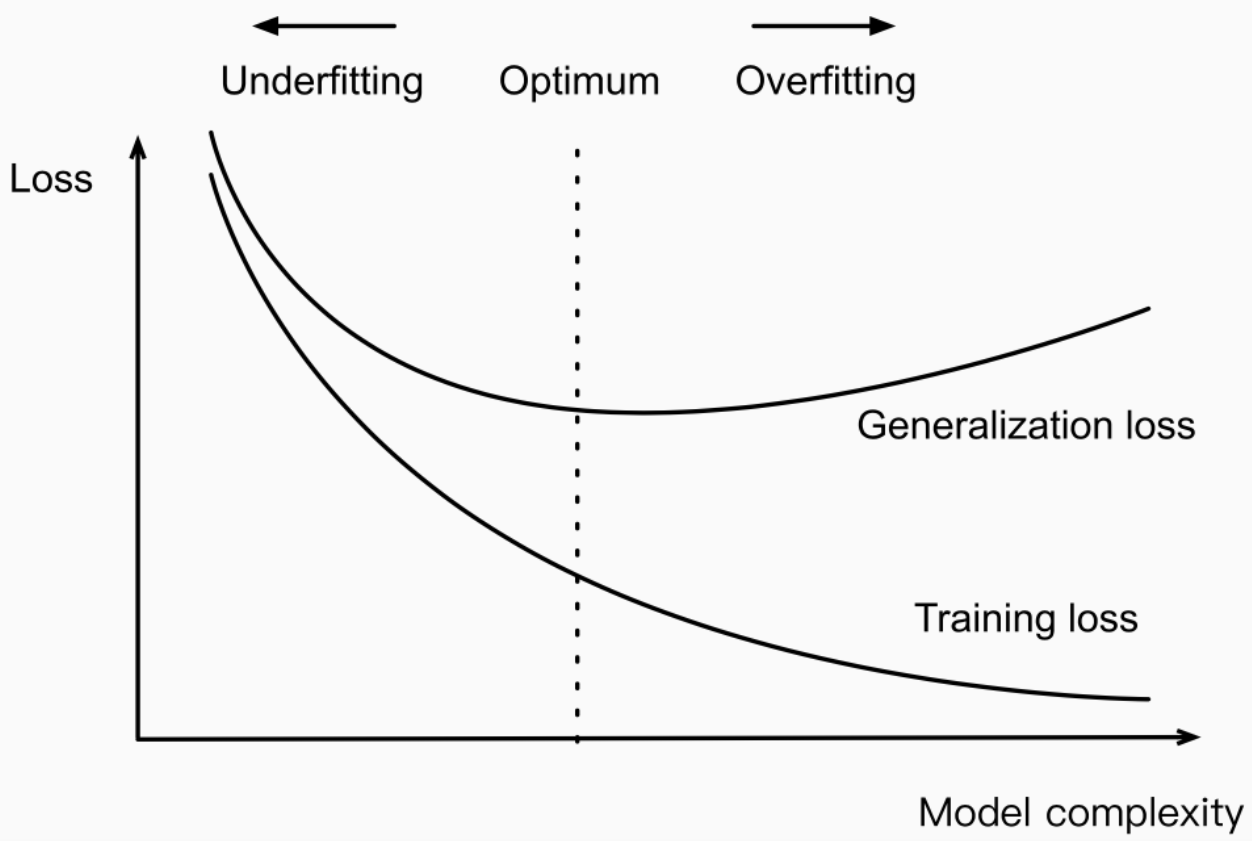

#### Feature Selection Techniques

- Forward selection:
    - We take a single feature and build a model on that
    - We do it for each and every feature
    - We select the feature which has the maximum performance
- Backward elimination
    - We take in all the features
    - Build the model
    - Remove features one by one to find out the set of the best possible feature space
- Recursive Feature Elimination
    - Just like Backward elimination but it operates recursively
    - It is the best method out of these 3
    - It has a very high computional cost and complexity

### Statistics:
    - information about the data
    
    1. Descriptive statistics
        - measurements of central tendency : mean, median, mode
        - measurement of dispersion : standard deviation, variance
    2. Inferential statistics
        - techniques using which we make and prove assumptions on the data
            - shapiro wilk test, chi square test, T test, F test, one way anova, two way anova, manova, one tailed tests, two tailed tests etc

# Building the base model

## Splitting the data

### data Segregation

In [364]:
df_processed.head(3)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohcv,enginetype_rotor,cylindernumber_mapped,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,4,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,4,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,1,0,6,0,0,0,0,1,0,0


In [365]:
features, target = df_processed.drop(columns = target_column), df_processed[target_column]
# X, y are usually used in pklace of features and target dataframe slices

In [366]:
features.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohcv,enginetype_rotor,cylindernumber_mapped,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,4,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,4,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,1,0,6,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,4,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,5,0,0,0,0,1,0,0


In [367]:
target.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


### Generating the train and test datasets

In [368]:
features_train, features_test, target_train, target_test = train_test_split(features,target, test_size = 0.3, 
                                                                           random_state = 9)

In [369]:
features_train.shape, features_test.shape, target_train.shape, target_test.shape

((143, 37), (62, 37), (143, 1), (62, 1))

## Building the base model

In [370]:
features_train.shape, features_test.shape, target_train.shape, target_test.shape

((143, 37), (62, 37), (143, 1), (62, 1))

### Instantiating the model

In [371]:
linear_regression_model = LinearRegression(n_jobs=-1)

In [372]:
linear_regression_model

LinearRegression(n_jobs=-1)

### Training the model

In [373]:
linear_regression_model.fit(X=features_train, y=target_train)

LinearRegression(n_jobs=-1)

In [374]:
linear_regression_model.coef_

array([[-8.61661441e+01,  6.12015255e+01, -4.40133465e+01,
         5.25374105e+02,  2.70811891e+02,  4.43675618e+00,
         1.25946259e+02, -2.23845602e+03, -3.85661150e+03,
        -1.12865266e+03, -1.45326882e+01,  2.26905494e+00,
        -8.75938626e+01,  3.10491094e+02,  6.10572409e+01,
        -5.98033087e+02, -7.62877555e+03,  2.05230538e+03,
        -6.12246994e+01,  7.17015475e+02, -2.52406006e+02,
         1.06249531e+03,  1.11407803e+04,  4.29717973e+03,
        -2.53837780e+03,  1.22867610e+03,  9.43752390e+02,
        -3.88456096e+03,  1.11584838e+04,  5.05444787e+02,
         1.19889147e+03,  2.59851984e+02,  7.62877555e+03,
        -1.40538260e+03,  2.55238170e+03, -9.30934623e+02,
         6.81127357e+02]])

In [166]:
linear_regression_model.coef_

array([[-8.61661441e+01,  6.12015255e+01, -4.40133465e+01,
         5.25374105e+02,  2.70811891e+02,  4.43675618e+00,
         1.25946259e+02, -2.23845602e+03, -3.85661150e+03,
        -1.12865266e+03, -1.45326882e+01,  2.26905494e+00,
        -8.75938626e+01,  3.10491094e+02,  6.10572409e+01,
        -5.98033087e+02,  4.74758739e+03, -4.74758739e+03,
        -1.02615269e+03,  1.02615269e+03, -6.12246994e+01,
         7.17015475e+02, -2.70029767e+02, -5.22435773e+02,
         7.92465540e+02, -5.57039017e+03,  5.57039017e+03,
        -1.60073619e+03,  2.69644354e+03, -4.13911399e+03,
        -3.72060083e+02, -6.56983796e+02, -5.48529714e+03,
         9.55774766e+03,  5.05444787e+02, -1.01478895e+03,
         1.84102516e+02, -7.54936970e+02,  4.74758739e+03,
        -2.42017155e+03,  1.53759275e+03, -1.94572358e+03,
        -3.33661597e+02]])

In [375]:
linear_regression_model.intercept_

array([-44803.84243417])

### Evaluate the model

#### Calculating predictions using the test feature data

In [376]:
predicted_target = linear_regression_model.predict(features_test)

#### Comparing the predictions made by the model with the actual target values

In [377]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [378]:
mean_absolute_error(target_test, predicted_target)

1595.7853908942836

In [379]:
np.sqrt(mean_squared_error(target_test, predicted_target))

2066.2135154097846

In [380]:
r2_val = r2_score(target_test, predicted_target)
r2_val

0.9303533246397231

In [381]:
target_df = pd.DataFrame({'Actual_Target':target_test.values.flatten(), 'Predicted_Target':predicted_target.flatten()})
target_df

,Actual_Target,Predicted_Target
0,17669.0,16329.062878
1,5499.0,6630.731895
2,10945.0,11783.942759
3,40960.0,42521.181325
4,7898.0,5183.672221
...,...,...
57,6692.0,6718.594557
58,30760.0,29962.394599
59,6095.0,6833.693871
60,17710.0,21841.427463


In [382]:
adj_r2 = 1-(((1-r2_val)*(143-1))/(143-43-1))
adj_r2

0.9001027484731382

In [383]:
target_df['Error'] = target_df.Actual_Target - target_df.Predicted_Target
target_df['Error'] = target_df.Error.apply(np.square).apply(lambda x: round(x,2))

In [384]:
sorted(target_df.Error.values)

[53.17,
 157.66,
 240.35,
 707.27,
 1846.17,
 1898.58,
 12627.22,
 19557.05,
 69402.79,
 78122.1,
 162640.25,
 215232.21,
 250088.03,
 346000.28,
 475207.13,
 512836.0,
 527033.96,
 545668.63,
 579685.93,
 603660.39,
 636174.38,
 703824.95,
 720550.35,
 826528.02,
 913955.22,
 930719.71,
 984913.26,
 1154435.54,
 1280817.08,
 1369539.22,
 1689889.3,
 1795431.49,
 1798835.56,
 1970886.64,
 2278846.66,
 2389644.65,
 2437287.13,
 2502451.29,
 2699885.0,
 2867864.98,
 2947261.39,
 3041983.29,
 3278095.93,
 3434321.86,
 3678857.08,
 3892042.24,
 3893774.22,
 4593201.87,
 6952406.32,
 7367575.29,
 7650603.4,
 11069586.84,
 11539464.89,
 12038079.26,
 12958537.68,
 15742483.54,
 16348384.54,
 16511978.36,
 17068692.88,
 17339915.55,
 17517527.91,
 29472854.09]

In [385]:
heights = np.array([4, 4.2, 3.8, 3.6, 7])
heights.mean(), np.median(heights)

(4.5200000000000005, 4.0)

In [386]:
heights = np.array([4, 4.2, 3.8, 3.6, 4])
heights.mean(), np.median(heights)

(3.9200000000000004, 4.0)

In [387]:
heights = np.array([4, 4.2, 3.8, 3.6, 1])
heights.mean(), np.median(heights)

(3.3200000000000003, 3.8)

# Improvising the model

In [388]:
df_processed

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohcv,enginetype_rotor,cylindernumber_mapped,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,4,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,4,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,1,0,6,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,4,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,5,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,4,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,4,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,1,0,6,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,6,0,0,1,0,0,0,0


In [390]:
for col in df_processed.columns:
    if sorted(df_processed[col].unique()) == [0,1]:
        print(col, end=',')

fueltype_gas,aspiration_turbo,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,

In [393]:
one_hot_encoded_vars = 'fueltype_gas,aspiration_turbo,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi'.split(',')
sorted(one_hot_encoded_vars)

['aspiration_turbo',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_rear',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mfi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi',
 'fueltype_gas']

In [392]:
remaining_vars = df_processed.columns.difference(one_hot_encoded_vars)
remaining_vars

Index(['CarCompanyName_le', 'CarName_Encoded', 'boreratio', 'carbody_ord_enc',
       'carheight', 'carlength', 'carwidth', 'citympg', 'compressionratio',
       'curbweight', 'cylindernumber_mapped', 'doornumber_num', 'enginesize',
       'highwaympg', 'horsepower', 'peakrpm', 'price', 'stroke', 'symboling',
       'wheelbase'],
      dtype='object')

In [394]:
from sklearn.feature_selection import RFE

In [396]:
# Instantiating the base estimator for RFE
base_estimator = LinearRegression(n_jobs=-1)
# Setting the best n features
best_n_features = 20

In [397]:
features, target = df_processed.drop(columns = target_column), df_processed[target_column]

features.shape, target.shape

((205, 37), (205, 1))

In [399]:
# Setting up the configuration for RFE
rfe = RFE(estimator=base_estimator, n_features_to_select=best_n_features)

# Finding the best features
rfe.fit(features, target)

RFE(estimator=LinearRegression(n_jobs=-1), n_features_to_select=20)

In [400]:
# Total best features extracted
rfe.n_features_

20

In [401]:
# Find out the selected best features
rfe.support_

array([False, False, False,  True,  True, False, False,  True,  True,
        True, False, False, False, False, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False, False,  True,  True, False,  True,  True,
        True])

In [405]:
selected_features1 = features.columns[rfe.support_]
selected_features1

Index(['carwidth', 'carheight', 'boreratio', 'stroke', 'compressionratio',
       'CarCompanyName_le', 'fueltype_gas', 'carbody_ord_enc',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_ohcv', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [406]:
# Visualize the ranking of all the columns
rfe.ranking_

array([ 7, 13, 15,  1,  1, 17,  5,  1,  1,  1, 14, 18, 16, 10, 11,  1,  1,
        3,  6,  1,  1,  1,  1,  1,  1, 12,  1,  1,  2,  9,  8,  1,  1,  4,
        1,  1,  1])

In [408]:
ranks = pd.DataFrame({'ColumnName':features.columns, 'FeatureImportanceRank':rfe.ranking_})
ranks

,ColumnName,FeatureImportanceRank
0,symboling,7
1,wheelbase,13
2,carlength,15
3,carwidth,1
4,carheight,1
5,curbweight,17
6,enginesize,5
7,boreratio,1
8,stroke,1
9,compressionratio,1


In [409]:
ranks.sort_values('FeatureImportanceRank').reset_index(drop=True)

,ColumnName,FeatureImportanceRank
0,fuelsystem_spfi,1
1,drivewheel_rwd,1
2,drivewheel_fwd,1
3,carbody_ord_enc,1
4,fuelsystem_spdi,1
5,fueltype_gas,1
6,CarCompanyName_le,1
7,enginetype_l,1
8,enginetype_ohcf,1
9,enginetype_ohcv,1


In [ ]:
# Building a diff model using the selected features

In [418]:
selected_features1_ = list(selected_features1).__add__(['fuelsystem_2bbl'])
selected_features1_

['carwidth',
 'carheight',
 'boreratio',
 'stroke',
 'compressionratio',
 'CarCompanyName_le',
 'fueltype_gas',
 'carbody_ord_enc',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_rear',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi',
 'fuelsystem_2bbl']

In [420]:
X = df_processed[selected_features1_]
y = df_processed[target_column]

In [421]:
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.25, random_state=9)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((153, 21), (52, 21), (153, 1), (52, 1))

In [422]:
# Instantiating the new model
new_model = LinearRegression(n_jobs=-1)
# Training the new model
new_model.fit(train_x, train_y)

LinearRegression(n_jobs=-1)

In [424]:
# Making predictions using the new model
y_predicted = new_model.predict(test_x)

In [425]:
mean_absolute_error(test_y, y_predicted)

2090.080878765454

In [426]:
mean_squared_error(test_y, y_predicted)

7812186.3051419305

In [427]:
r2_score(test_y, y_predicted)

0.8752407395875654

In [430]:
df_processed.to_csv('Data/CarPrice_processed.csv', index=False)